In [35]:
import numpy as np
from numpy.random import randn

import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sb

import scipy
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr

In [10]:
%matplotlib inline 
rcParams['figure.figsize'] = 8,4
plt.style.use('seaborn-whitegrid')

# The pearson correlation

In [11]:
address = '/Users/fyenne/Desktop/booooks/python/Python_course/Exercise Files/Data/mtcars.csv'
cars = pd.read_csv(address) #header = infer

cars.columns.values[0]='car_names' # rename first_position, col_name 
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


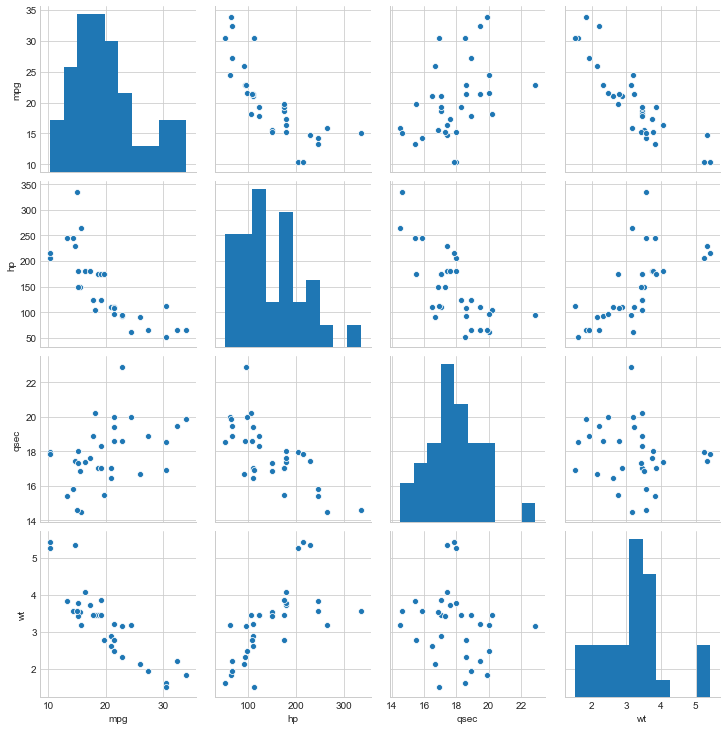

In [13]:
X = cars[['mpg', 'hp', 'qsec', 'wt']]
sb.pairplot(X)

In [18]:
mpg = cars.mpg
# or mpg = cars['mpg']
hp = cars.hp
qsec = cars.qsec
wt = cars.wt

pearsonr_coefficient, p_value = pearsonr(mpg, hp)
print('PearsonR correlationship coefficient %0.3f'% (pearsonr_coefficient))

# 0.3f 三位小数占位符

PearsonR correlationship coefficient -0.776


In [19]:
pearsonr_coefficient, p_value = pearsonr(mpg, wt)
print('PearsonR correlationship coefficient %0.3f'% (pearsonr_coefficient))


PearsonR correlationship coefficient -0.868


## ultinativly use pand to calculate Pearson corr

In [20]:
corr = X.corr()
corr

,mpg,hp,qsec,wt
mpg,1.000000,-0.776168,0.418684,-0.867659
hp,-0.776168,1.000000,-0.708223,0.658748
qsec,0.418684,-0.708223,1.000000,-0.174716
wt,-0.867659,0.658748,-0.174716,1.000000


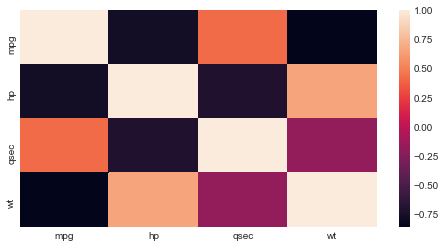

In [21]:
sb.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values)
# corr map.

# Nonparametric correlation

## Spearman rank correlation

In [23]:
# cars
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


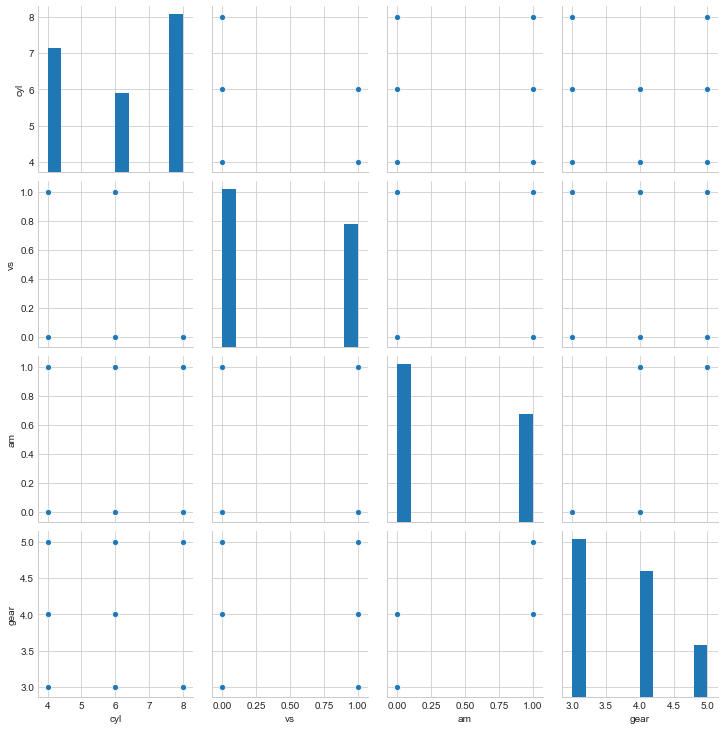

In [25]:
X = cars[['cyl', 'vs', 'am', 'gear']] 
sb.pairplot(X) # These datas are ordinal and non-linear.
# how many cylinder

In [36]:
cyl = cars.cyl
vs = cars.vs
am = cars.am
gear = cars.gear

spearmanr_coefficient, p_value = spearmanr(cyl, vs)

print('Spear Rank correlation coef %0.3f' %(spearmanr_coefficient))

# correlation between categorical variables.

Spear Rank correlation coef -0.814


## Chi-square test for independence

In [39]:
table = pd.crosstab(cyl, am)

from scipy.stats import chi2_contingency

Chisqure statistic 8.741 p_value 0.013


In [41]:
table

am,0,1
cyl,,
4,3,8
6,4,3
8,12,2


In [44]:
# H_0: these are not correlated.
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square statistic %0.3f p_value %0.3f dof %0.3f' %
      (chi2, p, dof))

Chi-square statistic 8.741 p_value 0.013 dof 2.000


<span class="mark">Reject the null hypo that am and cyl are not correlated</span>

In [46]:
table2 = pd.crosstab(cyl, vs)
table2

vs,0,1
cyl,,
4,1,10
6,3,4
8,14,0


In [51]:
# H_0: these are not correlated.
chi2, p, dof, expected = chi2_contingency(table2.values)
print('Chi-square statistic %0.3f p_value %0.3f dof %0.3f' %
      (chi2, p, dof))

Chi-square statistic 21.340 p_value 0.000 dof 2.000


In [54]:
chi2
# expected

21.339929911358485